# Exercise 1

In [4]:
library(ggplot2)
theme_set(theme_bw())
theme_update(panel.grid.minor.x=element_blank())
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

In [5]:
dztb <- function(k, n, p) {ifelse(k > 0, dbinom(k, n, p) / (1 - (1 - p)^n), 0)}


pztb <- function(k, n, p) {
    res <- numeric(length(k))
    for (i in seq_along(k)) {res[i] <- sum(dztb(0:k[i], n, p))}
    return(res)
}

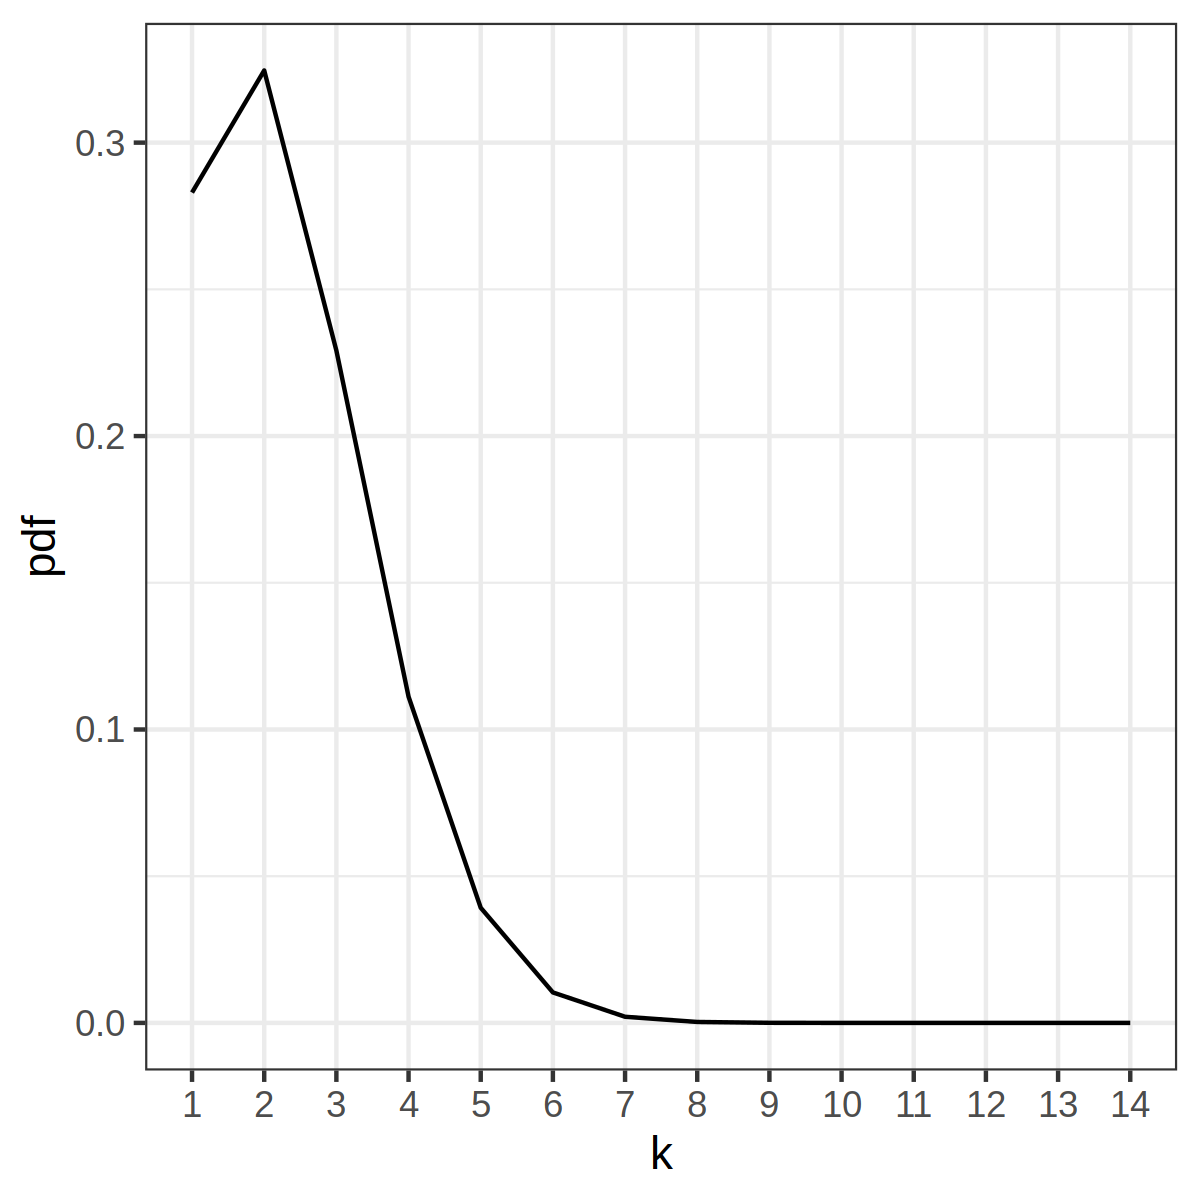

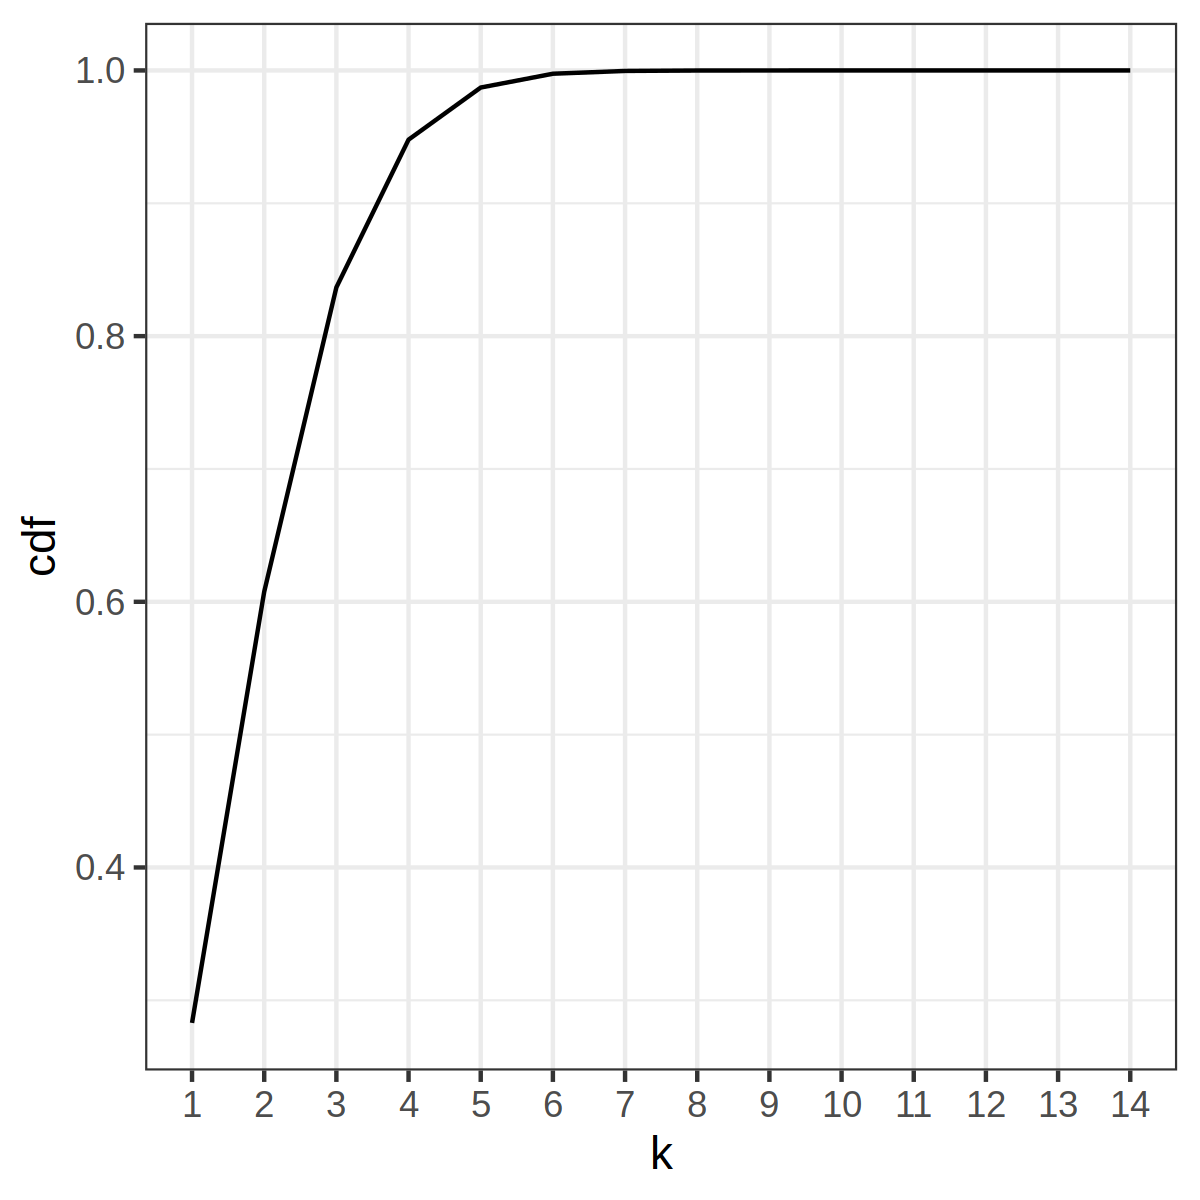

In [6]:
k <- 1:14
d <- dztb(k,14,.15)
p <- pztb(k,14,.15)

ggplot(data.frame(k, pdf=d), aes(k, pdf)) + geom_line() + scale_x_continuous(breaks=k)
ggplot(data.frame(k, cdf=p), aes(k, cdf)) + geom_line() + scale_x_continuous(breaks=k)

In [13]:
mean <- sum(k * dztb(k, 14, .15))  # Mean
mean
sum(k^2 * dztb(k,14,.15)) - mean ^ 2  # Variance
14 * .15
14 * .15 * (1 - .15)

[1] 2.340536

[1] 1.426472

[1] 2.1

[1] 1.785

In [6]:
rztb <- function(N, n, p) {
    nums <- numeric(N)
    for (i in 1:N) {
        un <- runif(1); num <- 0; dp <- 0
        while (un > dp) {num <- num + 1; dp <- dp + dztb(num, n, p)}
        nums[i] <- num
    }
    return(nums)
}

In [7]:
mean((sample <- rztb(10000, 14, .15)))

[1] 2.3392

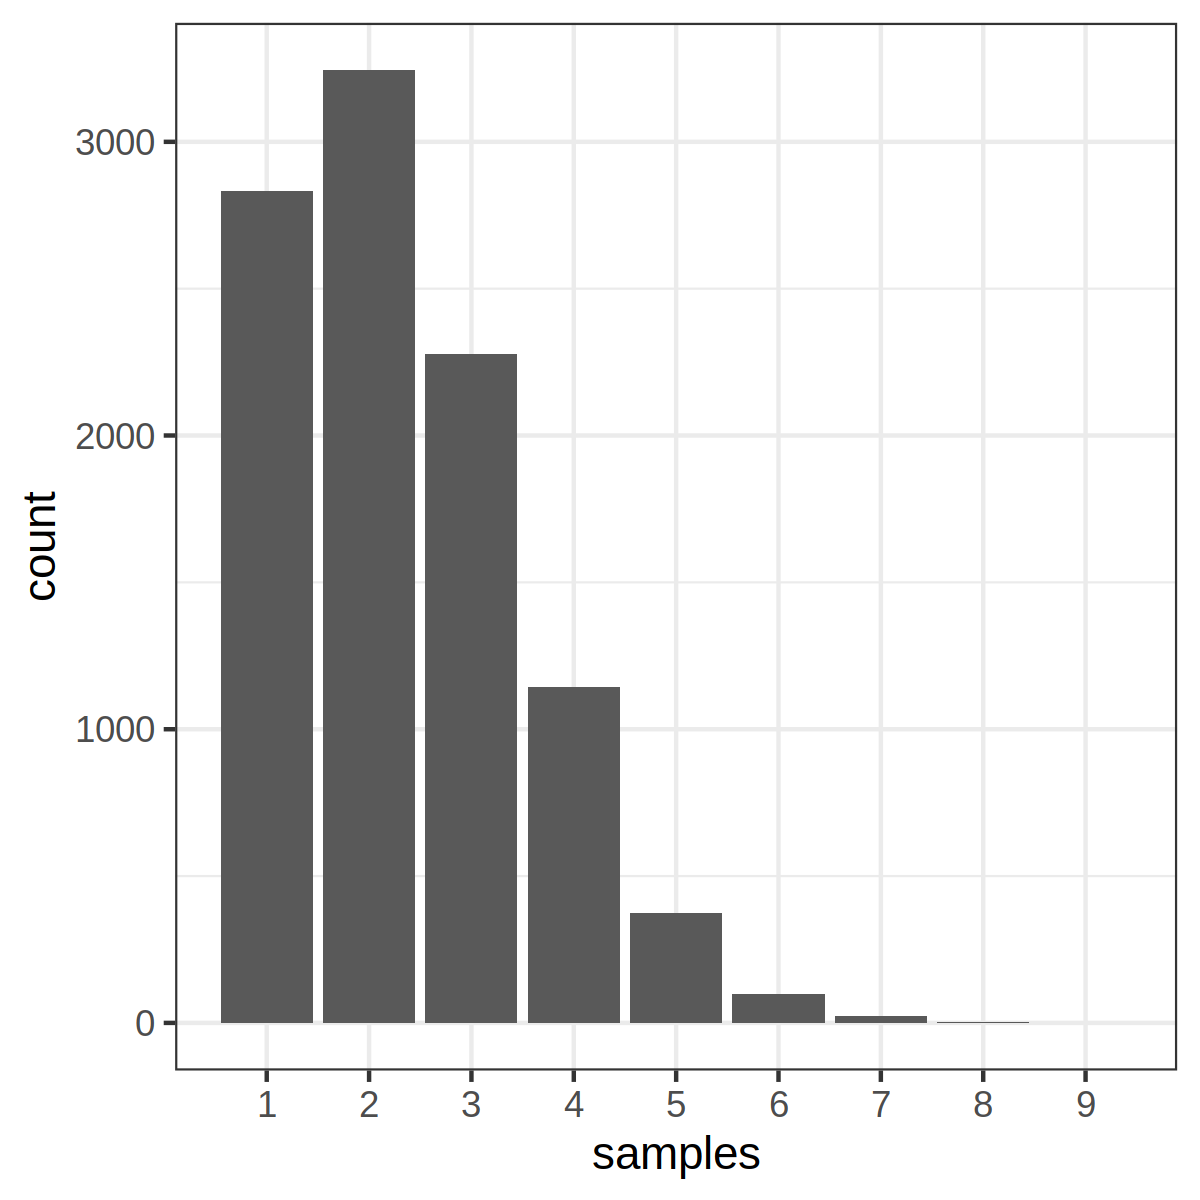

In [8]:
ggplot(data.frame(samples=sample), aes(samples)) + geom_bar() + scale_x_continuous(breaks=1:14)

# Exercise 2

In [9]:
dmu <- function(E, E0=7.25, gamma=2.7) {ifelse(E < E0, 1, (E - E0 + 1)^(-gamma))}

N <- 1 / integrate(dmu, 0, Inf)$value


dmu_norm <- function(E, E0=7.25, gamma=2.7) {N * dmu(E, E0, gamma)}


pmu_norm <- function(E, E0=7.25, gamma=2.7) {integrate(dmu_norm, 0, E)$value}

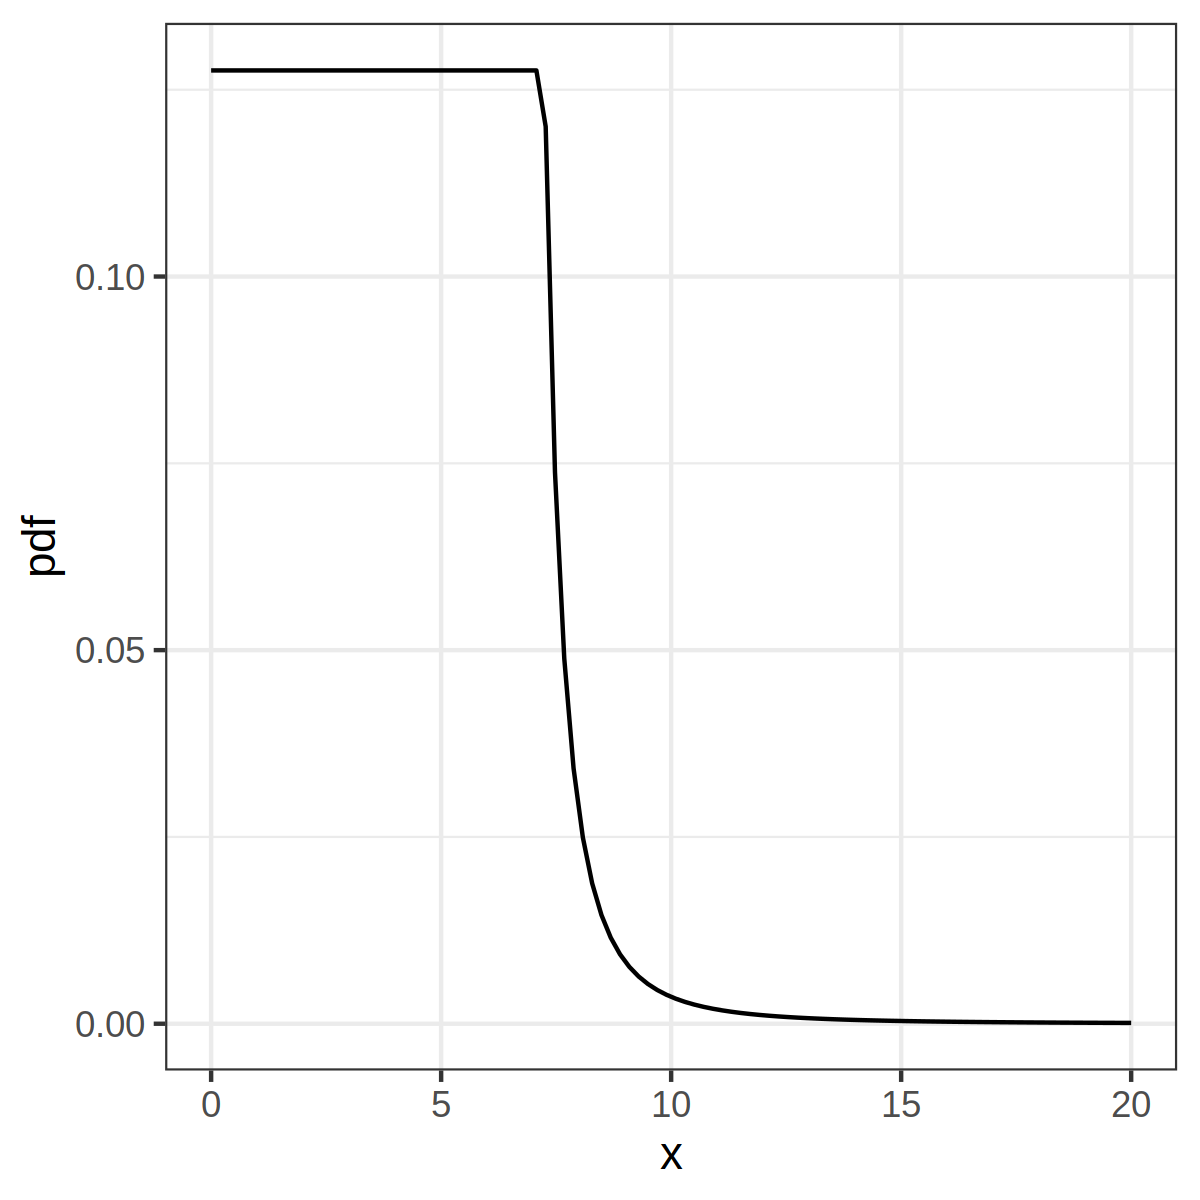

In [10]:
x <- seq(0, 20, length.out=100)
y <- numeric(length(x))
for (i in seq_along(x)) {y[i] <- dmu_norm(x[i])}
ggplot() + (pdfline <- geom_line(data=data.frame(x=x, pdf=y), mapping=aes(x,pdf)))

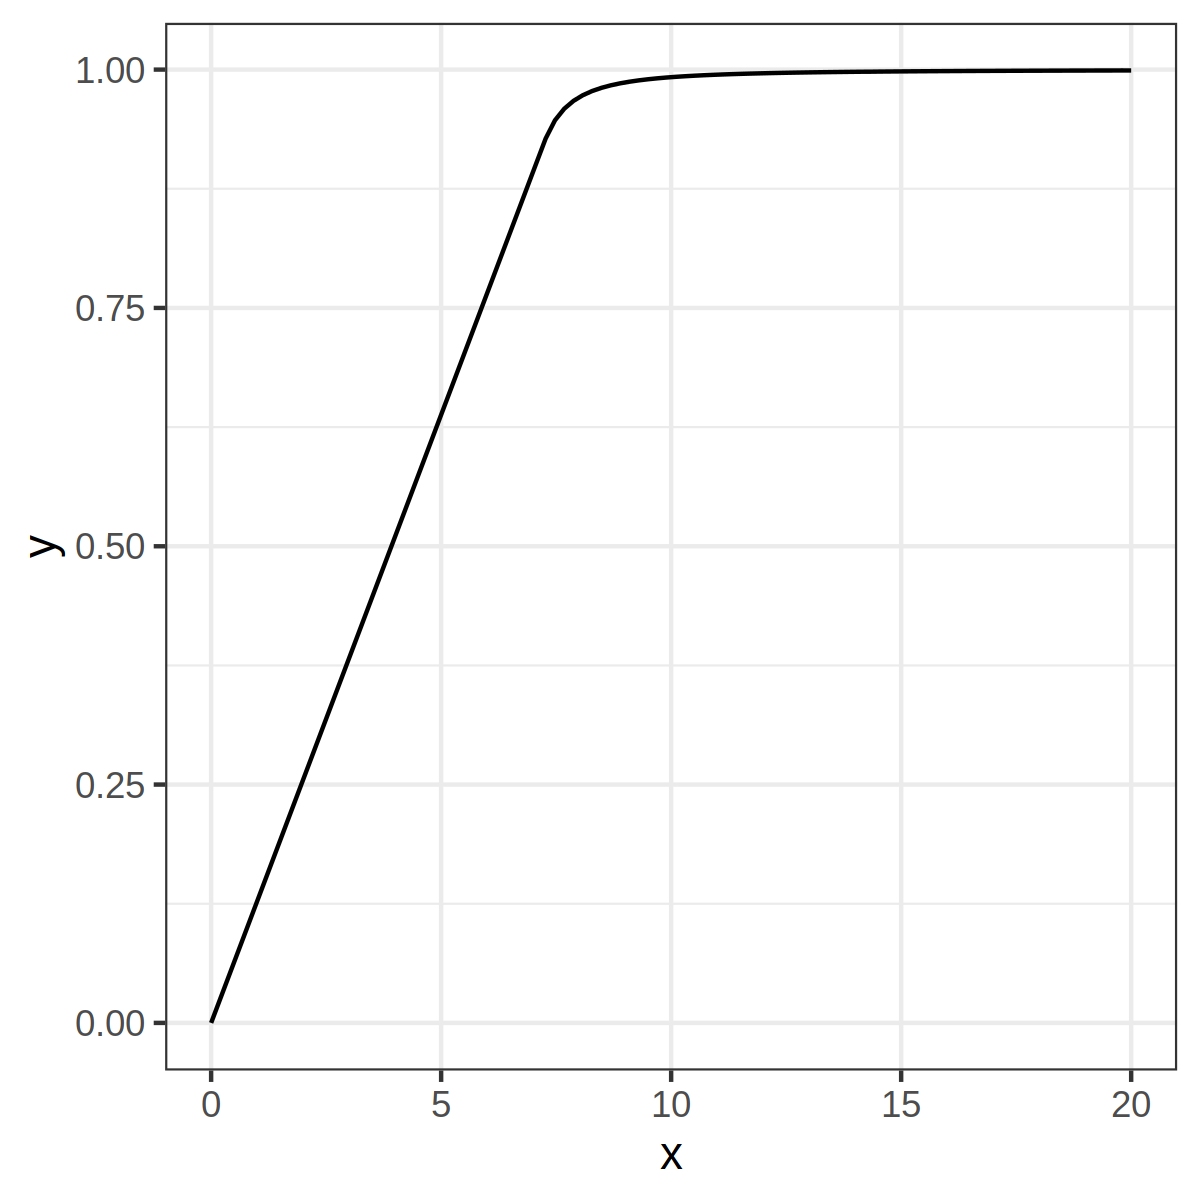

In [11]:
x <- seq(0,20, length.out=100)
y <- numeric(length(x))
for (i in seq_along(x)) {y[i] <- pmu_norm(x[i])}
ggplot(data.frame(x=x, y=y), aes(x,y)) + geom_line()

In [12]:
integrate(function(x) {x * dmu_norm(x)}, 0, Inf)$value

[1] 4.004251

In [13]:
inv.pmu <- function(y, E0=7.25, gamma=2.7) {ifelse(y < N * E0, y/N, ((1 - gamma) * (y / N - E0) + 1) ^ (1 / (1 - gamma)) + E0 - 1)}
rmu_norm <- function(N, E0=7.25, gamma=2.7) {runif(N) |> inv.pmu()}

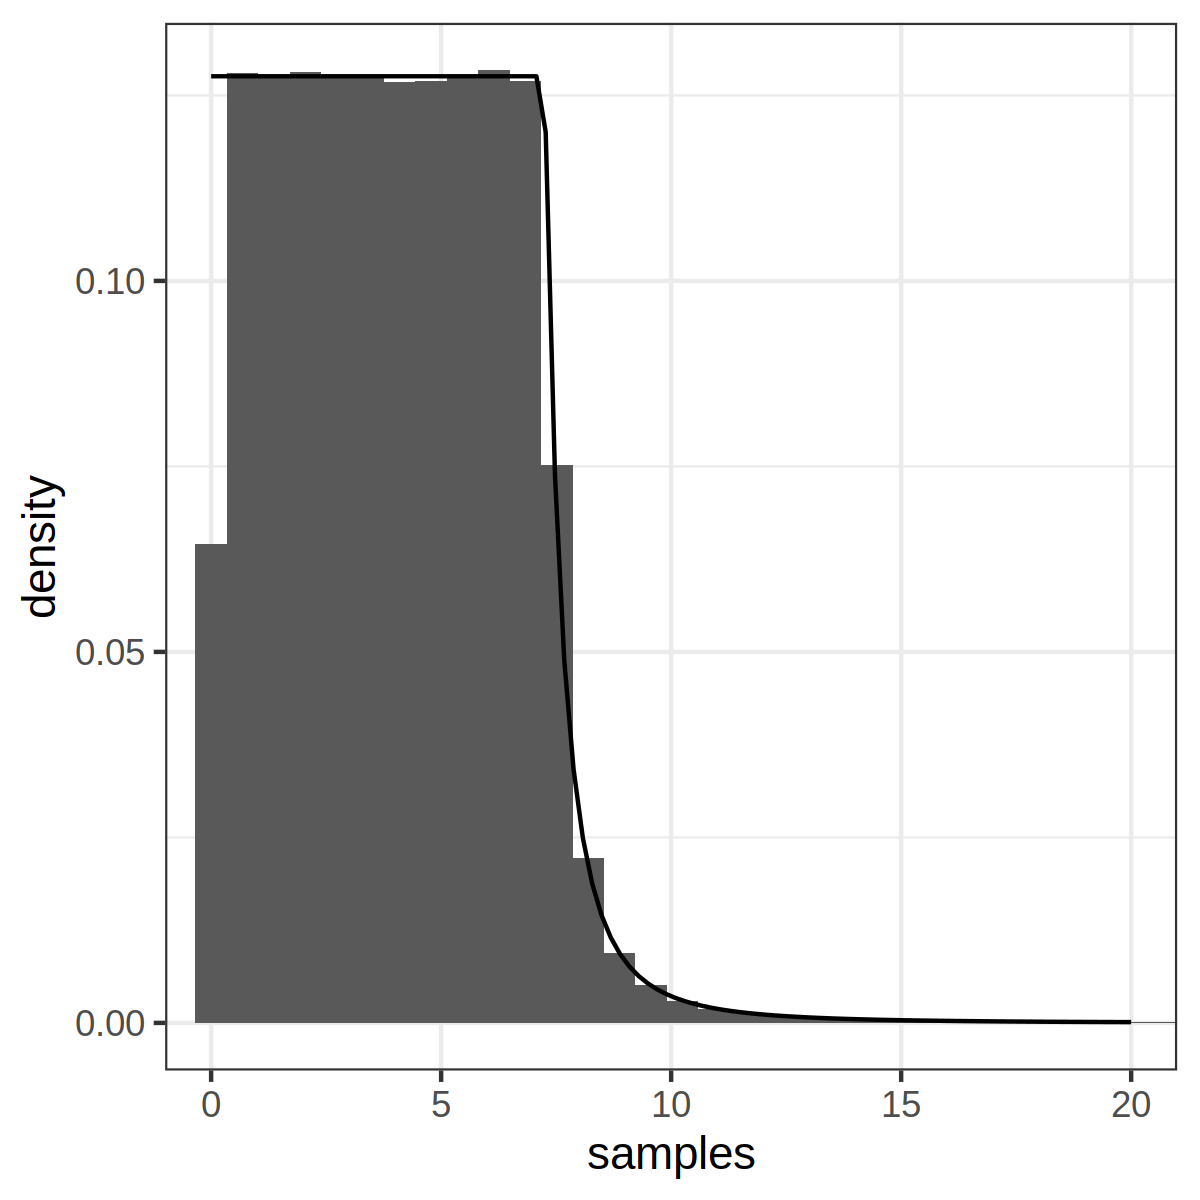

In [14]:
df <- data.frame(samples=rmu_norm(1e6))
ggplot(df, aes(samples)) + geom_histogram(aes(y=after_stat(density)), bins=1e3) + coord_cartesian(xlim=c(0,20)) + pdfline

# Exercise 3

Using Markov's inequality:

In [15]:
7/30

[1] 0.2333333

The value computed with a Poisson distribution is of several orders lower than the bound imposed by Markov, but this is only a bound.

In [16]:
1 - ppois(29, 7)

[1] 9.982992e-11

$P(X\ge 30) = P(X-7\ge23) \le P(|X-7|\ge23) \le \frac{Var}{23^2}$ by Chebyshev's inequality

In [17]:
5/23^2

[1] 0.009451796

# Exercise 4

In [30]:
1e6 / qpois(.95, 350*60)

[1] 47.0832

# Exercise 5

In [38]:
broadcast <- function () {
    people <- rep(c(T, F), times=c(5, 995))  # Create a new community
    for (day in 1:15) {
        # Each knowing person talks to someone else (i.e.: they may talk to someone who already knows the rumor, but not themselves)
        for (awake in (1:1000)[people]){people[sample(setdiff(1:1000, awake), 1)] <- T}
    }
    # Return the number of knowing people
    sum(people)
}

In [40]:
villages <- numeric(1e3)
for (i in seq_along(villages)) {villages[i] <- broadcast()}
m.vill <- mean(villages)
var.vill <- var(villages)

In [55]:
m.vill
var.vill
# Applying Chebyshev is illegal since 999 > 500... And Markov gives a not so sensical result
m.vill / 500

[1] 999.262

[1] 0.7100661

[1] 1.998524

# Exercise 6

Taking $30 s$ as time unit:
$P(N(4)>6) = 1 - \sum_{i=0}^{6} P(N(4)=i)$

In [23]:
cat('Prob. of more than 6 passenger after 2 minutes:', 1 - ppois(6, 4),
'\nProb. of less than 4 passenger after 3 minutes:', ppois(3, 6))

Prob. of more than 6 passenger after 2 minutes: 0.110674 
Prob. of less than 4 passenger after 3 minutes: 0.1512039

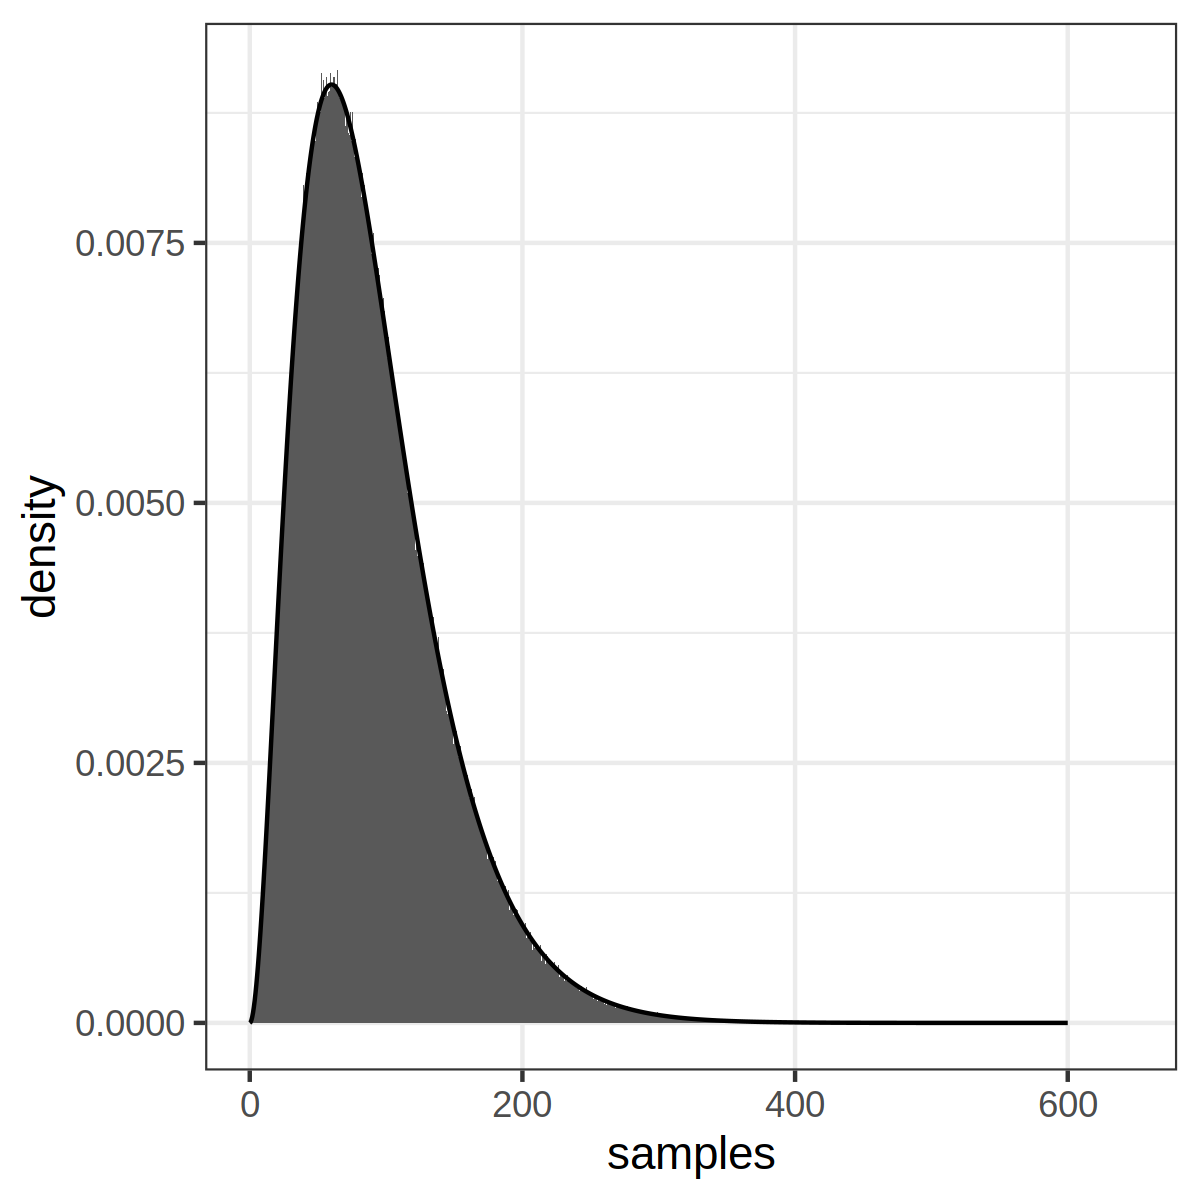

In [24]:
sim <- data.frame(samples=rgamma(1e6, 3, 1/30))
x <- seq(0,600,length.out=1e3)
ggplot(sim, aes(samples)) + geom_histogram(bins=1e3, aes(y=after_stat(density))) + geom_line(data=data.frame(x=x, y=dgamma(x, 3, 1/30)), aes(x,y))

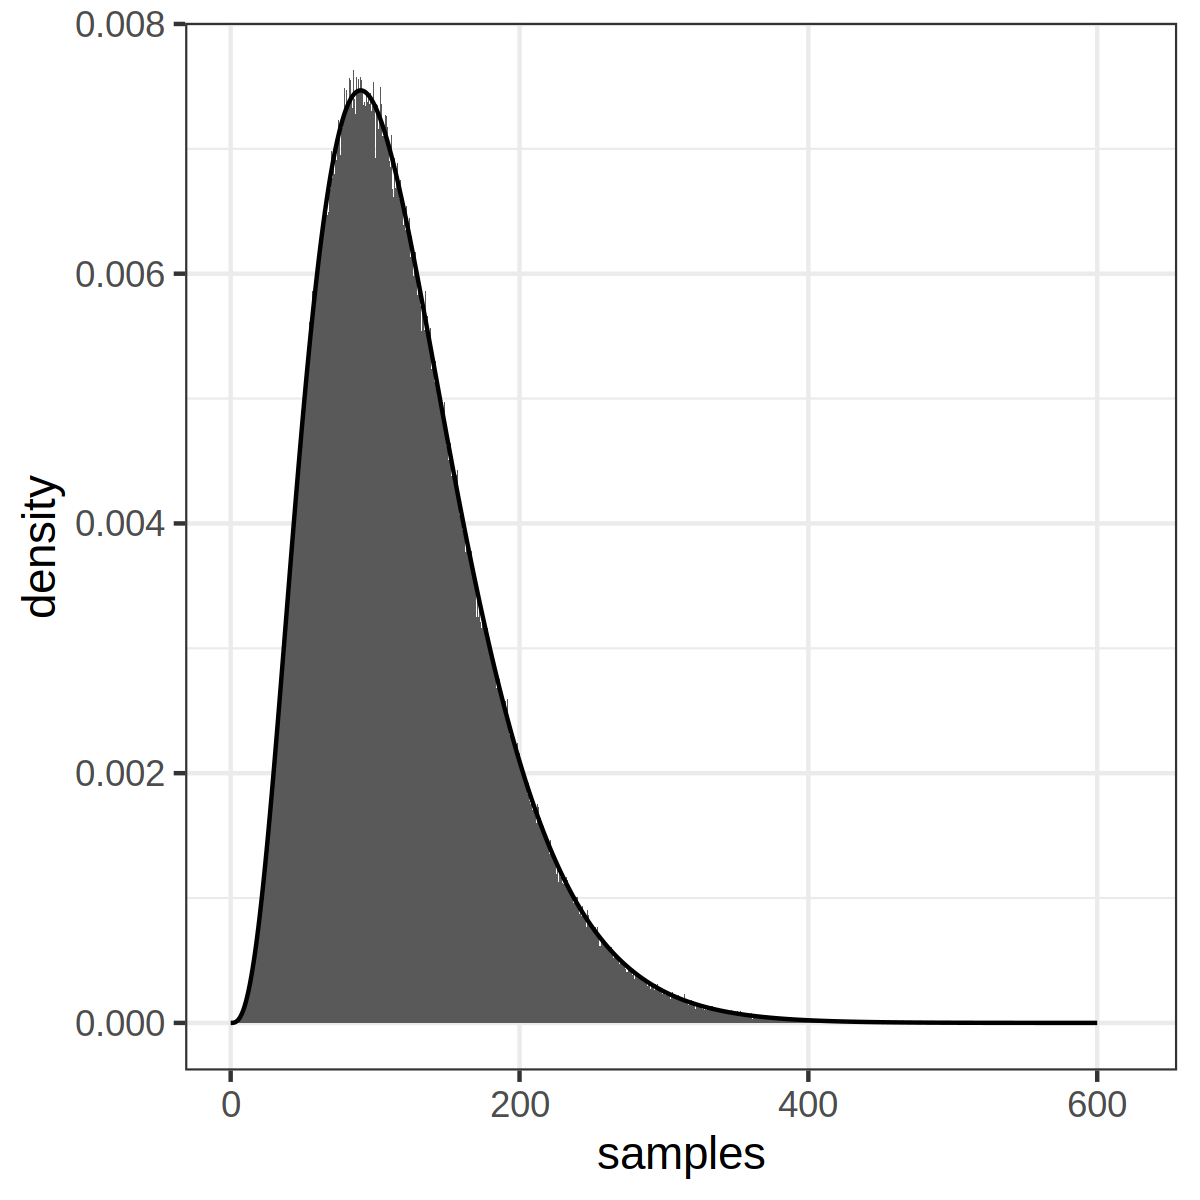

In [25]:
sim <- data.frame(samples=rgamma(1e6, 4, 1/30))
x <- seq(0,600,length.out=1e3)
ggplot(sim, aes(samples)) + geom_histogram(bins=1e3, aes(y=after_stat(density))) + geom_line(data=data.frame(x=x, y=dgamma(x, 4, 1/30)), aes(x,y))